## IMPORTS

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf

import matplotlib.pyplot as plt

## GENERATING SYNTHETIC DATA

In [8]:
np.random.seed(0)
x = np.random.rand(1000)

y = 3*x + 2 + np.random.normal(0, 0.1, 1000)
data = pd.DataFrame({'x': x, 'y': y})
print(f"Data shape: {data.shape}")
print(f"Maximum x: {data['x'].max()}")
print(f"Minimum x: {data['x'].min()}")
print(f"Maximum y: {data['y'].max()}")
print(f"Minimum y: {data['y'].min()}")
data.head()

Data shape: (1000, 2)
Maximum x: 0.9998085781169653
Minimum x: 0.0005459648969956543
Maximum y: 5.195401698689434
Minimum y: 1.9124125637166642


,x,y
0,0.548814,3.636271
1,0.715189,4.147496
2,0.602763,3.993249
3,0.544883,3.613233
4,0.423655,3.221063


## USING SKLEARN

(1000, 1)
0.9877991968962365


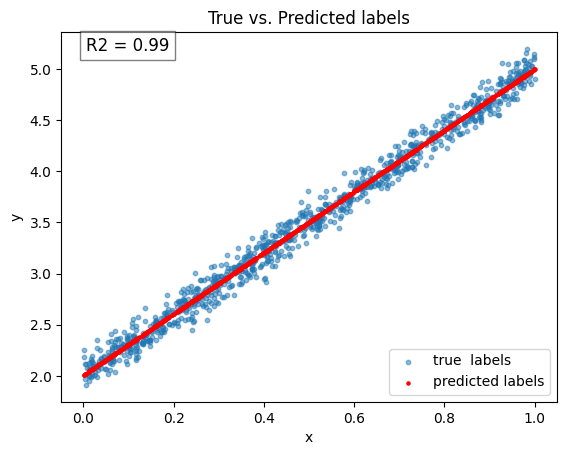

In [ ]:
# Linear regression
x_reshaped = x.reshape(-1, 1)
print(x_reshaped.shape)
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)
r2 = r2_score(y, y_pred)
print(model.score(x_reshaped, y))


# Plot observed vs. predicted values
plt.scatter(x_reshaped, y,s = 10,alpha=0.5, label='true  labels')
plt.scatter(x_reshaped, y_pred,s = 5, color='red', label='predicted labels')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs. Predicted labels')
plt.annotate(f'R2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()

## ONE NEURON - Tensorflow

Epoch 1/100


/home/kip/projects/ADL/ADLEnv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.9736 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7427
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4415
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9551
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8927
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4513
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4413
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9895
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7974
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4415
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3249
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9478
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7355
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6057
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2551
Epoch 16/100
32

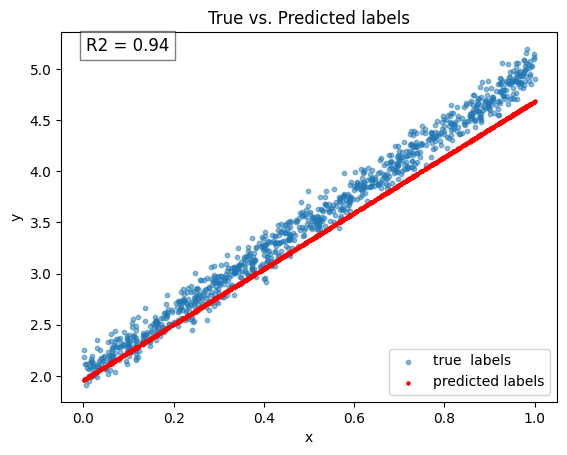

TensorFlow model weights: [array([[2.7242122]], dtype=float32), array([1.9593103], dtype=float32)]
Sklearn model coefficients: [2.99029623], intercept: 2.0077167249324077


In [19]:
# TensorFlow
tfmodel = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
tfmodel.compile(optimizer='adam', loss='mean_squared_error')
tfmodel.fit(x_reshaped, y, epochs=100, verbose=1)
tfy_pred = tfmodel.predict(x_reshaped).flatten()
tfr2 = r2_score(y, tfy_pred)




# Plot observed vs. predicted values
plt.scatter(x_reshaped, y,s = 10,alpha=0.5, label='true  labels')
plt.scatter(x_reshaped, tfy_pred,s = 5, color='red', label='predicted labels')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs. Predicted labels')
plt.annotate(f'R2 = {tfr2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()



# Compare coefficients
weights_tf = tfmodel.layers[0].get_weights()
print(f'TensorFlow model weights: {weights_tf}')
print(f'Sklearn model coefficients: {model.coef_}, intercept: {model.intercept_}')